# Classifiers in sklearn

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#import classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

Using the functions provided in the lecture's Jupyter notebook to generate the point clouds.

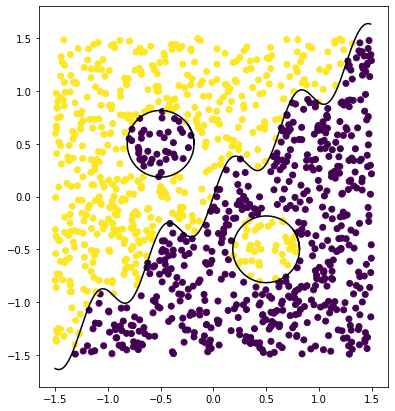

In [63]:
def get_train_test_data():
    def con1(x,y):
        if y>=0.2*np.sin(10*x)+x:
            rv = 1
        else:
            rv = -1
        return rv

    def con2(x,y):
        if (x+0.5)**2+(y-0.5)**2<= 0.1:
            rv = -2
        else:
            rv = 0
        return rv

    def con3(x,y):
        if (x-0.5)**2+(y+0.5)**2<= 0.1:
            rv = 2
        else:
            rv = 0
        return rv

    length=1500
    x_y_data_points = 3.*(np.random.rand(length,2)-[0.5,0.5])
    classes=[con1(x_y_data_points[i,0],x_y_data_points[i,1])+con2(x_y_data_points[i,0],x_y_data_points[i,1])+con3(x_y_data_points[i,0],x_y_data_points[i,1]) for i in range(len(x_y_data_points))]

    return train_test_split(x_y_data_points, classes)

# function that plots data with the true boundaries to axes
def plotTrueBoundaries(ax):
    phiRange = np.arange(0,7,0.1)
    xRange = np.arange(-1.5,1.5,0.01)
    x1 = -0.5 + np.sqrt(0.1)*np.cos(phiRange)
    y1 =  0.5 + np.sqrt(0.1)*np.sin(phiRange)
    x2 =  0.5 + np.sqrt(0.1)*np.cos(phiRange)
    y2 = -0.5 + np.sqrt(0.1)*np.sin(phiRange)
    y3 =  0.2*np.sin(10*xRange) + xRange
    ax.plot(x1, y1,'black')
    ax.plot(x2, y2,'black')
    ax.plot(xRange, y3,'black')

# generate training and test data
x_train, x_test, y_train, y_test = get_train_test_data()

plt.figure(figsize = (7,7))
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)
plotTrueBoundaries(plt.gca())
plt.gca().set_aspect('equal')

Now we build our classifiers, fit them with the data set plotted above and return their accuracy score.

In [64]:
support_vector_classifier = SVC()
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()
ada_boost_classifier = AdaBoostClassifier()

classifiers = [support_vector_classifier, decision_tree_classifier, random_forest_classifier, ada_boost_classifier]

for classifier in classifiers:
    classifier.fit(x_train, y_train)
    score = classifier.score(x_test, y_test)
    print("Accuracy of {classifier} is {score:.2f}%".format(classifier=classifier.__class__.__name__, score=score*100))

Accuracy of SVC is 89.60%
Accuracy of DecisionTreeClassifier is 92.80%
Accuracy of RandomForestClassifier is 95.47%
Accuracy of AdaBoostClassifier is 86.93%


Next we will define a function to plot the boundaries of our trained classifiers.

C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  


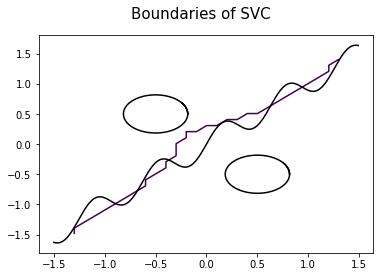

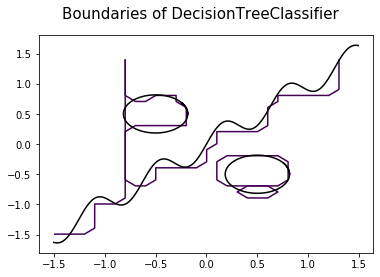

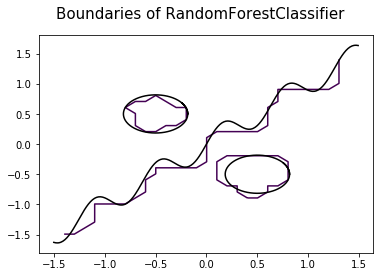

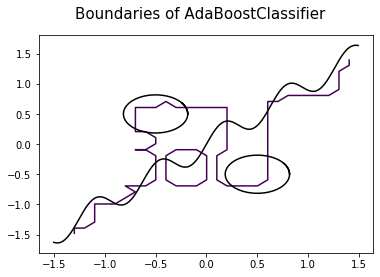

In [65]:
def plot_classifier_boundary(model, axis):
    # Get boundaries of training data
    x_1_train_min = min(x_train[:,0])
    x_2_train_min = min(x_train[:,1])
    x_1_train_max = max(x_train[:,0])
    x_2_train_max = max(x_train[:,1])

    x_1_grid, x_2_grid = np.meshgrid(np.arange(x_1_train_min, x_1_train_max, 0.1), np.arange(x_2_train_min, x_2_train_max, 0.1))

    grid_points = np.c_[x_1_grid.ravel(), x_2_grid.ravel()]

    predictions = model.predict(grid_points).reshape(len(x_1_grid),-1)

    axis.contour(x_1_grid, x_2_grid, predictions, levels=[-1,1])

for classifier in classifiers:
    fig, ax = plt.subplots()
    plotTrueBoundaries(ax)
    plot_classifier_boundary(classifier, ax)
    fig.suptitle('Boundaries of {classifier}'.format(classifier=classifier.__class__.__name__), fontsize=15)

We can see that SVC ignores the bubbles, AdaBoost struggles to fit them correctly. The best result with default parameters is given by the RandomForestClassifier.

Next we will vary the **maxdepth** parameter of the DecisionTreeClassifier and see what changes.

C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data ra

Text(0.5, 1.0, 'Accuracy of DecisionTreeClassifier with respect to max_depth parameter')

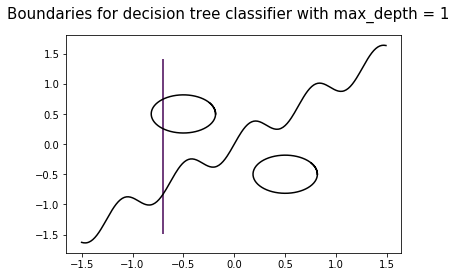

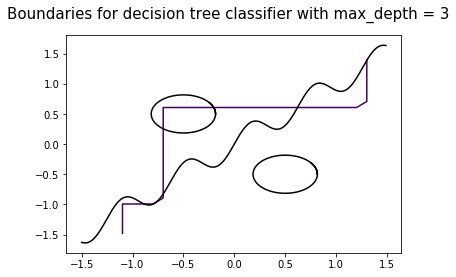

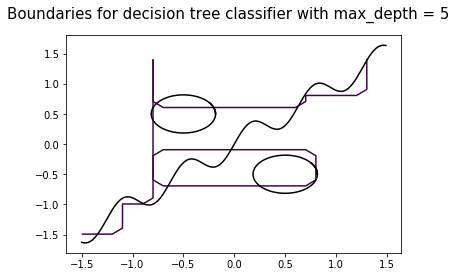

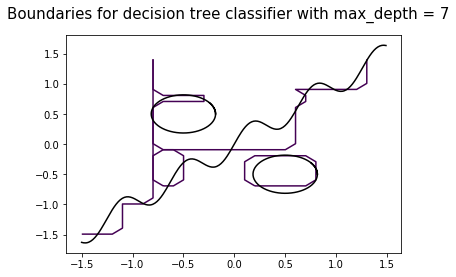

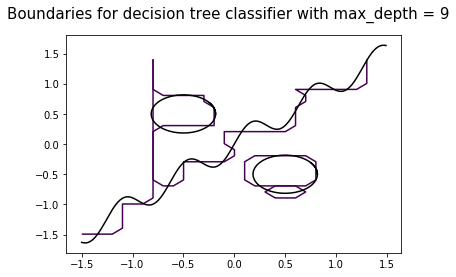

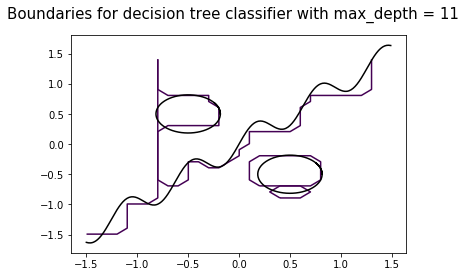

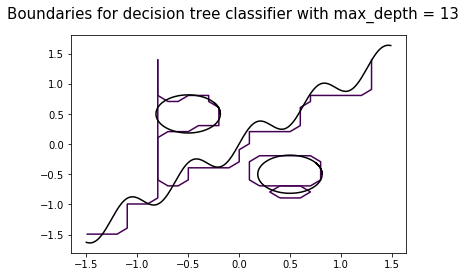

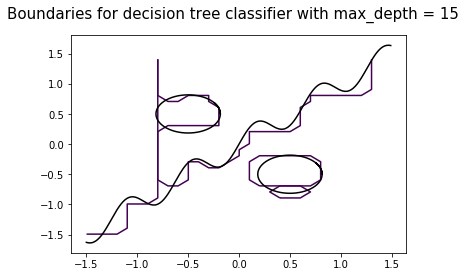

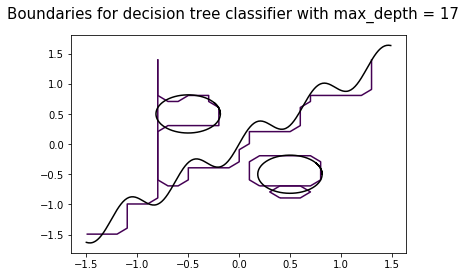

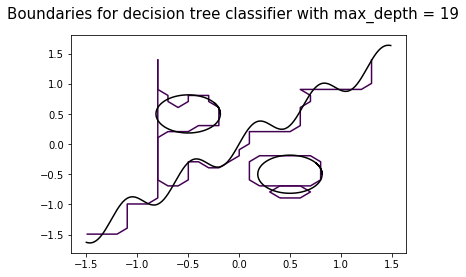

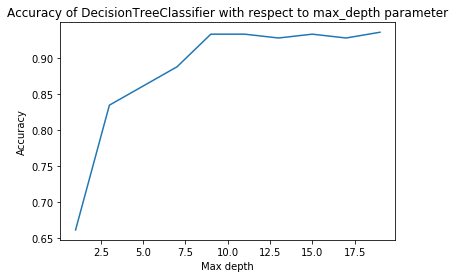

In [66]:
max_depths = np.arange(1,20,2)

scores = []

#Print out score and visualize boundary
for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test,y_test))

    fig, ax = plt.subplots()
    plotTrueBoundaries(ax)
    plot_classifier_boundary(model, ax)
    fig.suptitle('Boundaries for decision tree classifier with max_depth = {max_depth}'.format(max_depth=max_depth), fontsize=15)

# Plot scores against max_depth
fig, axis = plt.subplots()
plt.plot(max_depths,scores)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.title("Accuracy of DecisionTreeClassifier with respect to max_depth parameter")

We can see that by varying the max_depth parameter the boundaries of the DecisionTreeClassifier behave similar to a polynomial function when varying the polynomial degree. For increased max_depth the boundary can match more complex shapes and thus classify the features more accurately (As shown in the plots above).